In [1]:
import json
import os

with open("metrics.json", 'r') as handle:
    json_data = [json.loads(line) for line in handle]

In [2]:
training_loss = []
validation_loss = []
iteration = []

for i in json_data:
  if "iteration" in i.keys():
    if "total_loss" in i.keys():
      if "validation_loss" in i.keys():
        if i["iteration"] in iteration:
          continue
        iteration.append(i["iteration"])
        training_loss.append(i["total_loss"])
        validation_loss.append(i["validation_loss"])

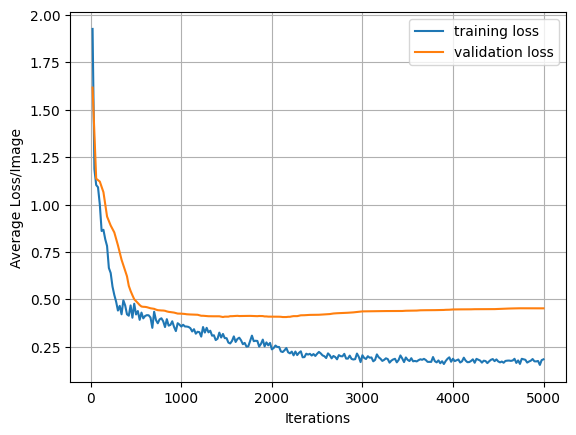

In [3]:
import matplotlib.pyplot as plt


plt.plot(iteration, training_loss, label = "training loss")
plt.plot(iteration, validation_loss, label = "validation loss")
plt.xlabel("Iterations")
plt.ylabel("Average Loss/Image")
# plt.ylim([0, 2.5])
plt.legend()
plt.grid()
plt.show()

In [4]:
validation_AP = []
validation_AP_50 = []
validation_AP_75 = []
iteration = []

for i in json_data:
  if "segm/AP" in i.keys():
    if "iteration" in i.keys():
      if i["iteration"] in iteration:
          continue
      iteration.append(i["iteration"])
      validation_AP.append(i["segm/AP"])
      validation_AP_50.append(i["segm/AP50"])
      validation_AP_75.append(i["segm/AP75"])
      
zipped_lists = zip(iteration, validation_AP, validation_AP_50, validation_AP_75)
sorted_lists = sorted(zipped_lists)

# Unzip the lists
iteration, validation_AP, validation_AP_50, validation_AP_75 = zip(*sorted_lists)

58.306136885066884


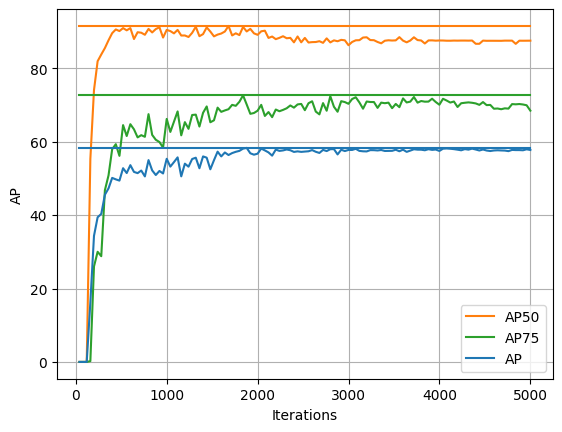

In [5]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(iteration, validation_AP_50, label = "AP50", c = '#ff7f0e')
plt.plot(iteration, np.ones(len(iteration))*np.max(validation_AP_50),  c = '#ff7f0e')
plt.plot(iteration, validation_AP_75, label = "AP75", c = '#2ca02c')
plt.plot(iteration, np.ones(len(iteration))*np.max(validation_AP_75),  c = '#2ca02c')
plt.plot(iteration, validation_AP, label = "AP", c = '#1f77b4')
plt.plot(iteration, np.ones(len(iteration))*np.max(validation_AP),  c = '#1f77b4')
print(np.max(validation_AP))
plt.xlabel("Iterations")
plt.ylabel("AP")
# plt.ylim([0, 2.5])
plt.legend()
plt.grid()
plt.show()